In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [7]:
wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [15]:
#In this exercise you will compare the accuracy of various types of classifier ensembles

tree = DecisionTreeClassifier(min_samples_leaf=3, random_state=1)
bagg = BaggingClassifier(n_estimators=50,random_state=1)
ada = AdaBoostClassifier(n_estimators=50, algorithm="SAMME", random_state=1)
grad = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, subsample=0.5, max_depth=1, random_state=1, min_samples_leaf=3)

In [23]:
#For each model determine its average accuracy using 5-fold stratified cross-validation
from sklearn.model_selection import cross_val_score

tree_sc = cross_val_score(tree, X, y)
bagg_sc = cross_val_score(bagg, X, y)
ada_sc = cross_val_score(ada, X, y)
grad_sc = cross_val_score(grad, X, y)
                          
print('Tree:', tree_sc, 'Average accuracy:', tree_sc.mean())
print('Bagging:', bagg_sc, 'Average accuracy:', bagg_sc.mean())
print('AdaBoost:', ada_sc, 'Average accuracy:', ada_sc.mean())
print('GradientBoosting:', grad_sc, 'Average accuracy:', grad_sc.mean())

Tree: [0.94444444 0.80555556 0.80555556 0.91428571 0.97142857] Average accuracy: 0.8882539682539681
Bagging: [0.94444444 0.94444444 0.94444444 0.97142857 1.        ] Average accuracy: 0.9609523809523809
AdaBoost: [0.83333333 0.91666667 0.91666667 1.         1.        ] Average accuracy: 0.9333333333333332
GradientBoosting: [0.91666667 0.97222222 0.97222222 0.65714286 0.97142857] Average accuracy: 0.8979365079365079


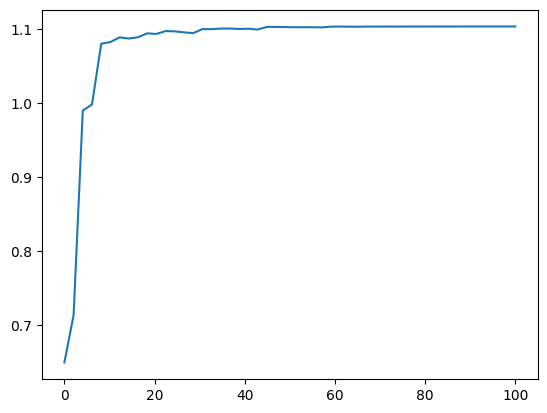

In [35]:
#Determine an approximated number of iterations after which the Gradient Boosting model yields almost no further improvement

#Fit the model on the whole dataset
model = grad.fit(X_train, y_train)

#Compute the cumulative improvement
impr = np.cumsum(grad.oob_improvement_)

#Prepare a plot of the above-mentioned OOB loss with respect to the number of iterations
x = np.linspace(0, 100, len(impr))
plt.plot(x, impr)